In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading file
data = pd.read_csv(r"C:\Users\Admin\Downloads\Clean_Dataset.csv",index_col=0)
data.head()

# PRICE is our target variable storing information of the ticket price indicating REGRESSION PROBLEM

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# EDA

In [3]:
# CHECKING DATA TYPE OF EACH VARIABLE
data.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

This dataset consists of 8 categorical variable and 3 numerical variable

In [4]:
# SHAPE 
print(data.shape)

(300153, 11)


In [5]:
# STATISTICAL SUMMARY OF THE DATA 
data.describe(include="all")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [6]:
# Viewing unique values present in our dataset
for col in data.columns:
    if data[col].dtype == 'object':
        print(data[col].name , data[col].unique())

airline ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
flight ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
source_city ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops ['zero' 'one' 'two_or_more']
arrival_time ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class ['Economy' 'Business']


In [7]:
# CHECKING IF ANY NULL VALUES
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

This dataset consists of no missing values

In [8]:
data.duplicated().sum()

0

No duplicates as well

In [9]:
print(data["price"].max())

print(data["price"].min())

# MAXIMUM price of flight is 1,23,071
# MINIMUM price of flight is 1105

123071
1105


In [10]:
# 1.) AIRLINE having most number of FLIGHTS

data["airline"].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

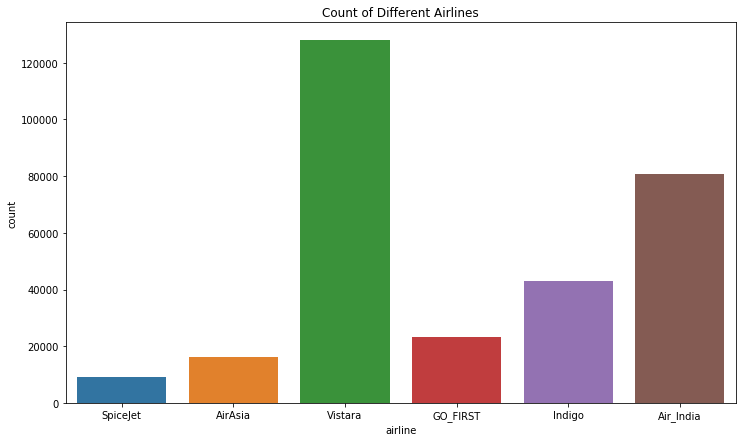

In [11]:
plt.figure(figsize=(12,7))

sns.countplot(x="airline", data=data)

plt.title("Count of Different Airlines")
plt.show()

# VISTARA airline has the highest number of flights followed by AIR_INDIA

Vistara, Air_India and AirAsia belongs to Tata Group Airlines

In [12]:
# 2.) Difference between CLASSES provided by AIRLINE

data["class"].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

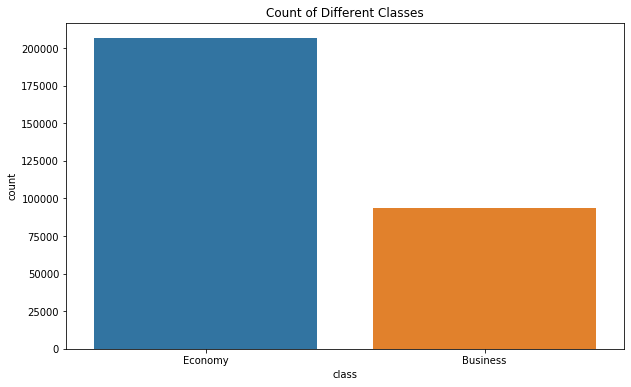

In [13]:
plt.figure(figsize=(10,6))

sns.countplot(x="class", data=data)

plt.title("Count of Different Classes")
plt.show()

# Most of the Airlines provides ECONOMY class tickets

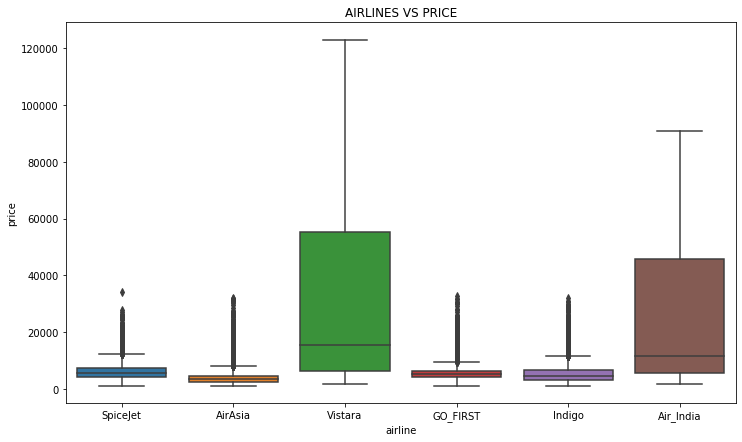

In [4]:
# 3.) PRICE difference between different AIRLINES                   

plt.figure(figsize=(12,7))
sns.boxplot(x="airline", y="price", data=data)
plt.title("AIRLINES VS PRICE")
plt.show()

# VISTARA has the most expensive ticket Price followed by AIR_INDIA (coz of business class)
# SPICEJET, GO_FIRST, INDIGO , AirAsia ticket prices are comparatively on LOWER SIDE when compared to others

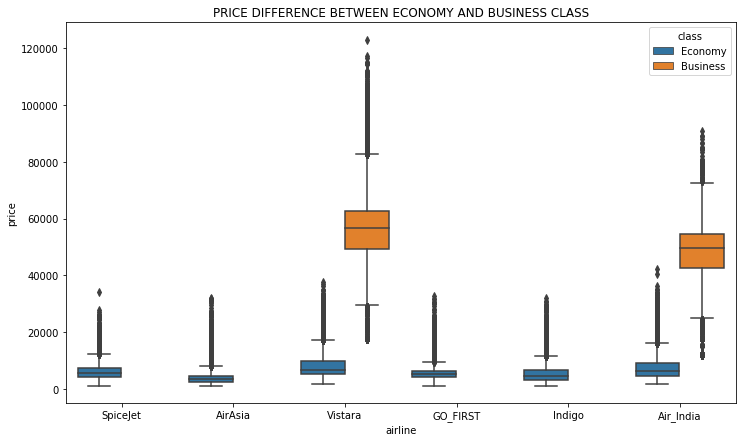

In [7]:
# 4.) How does the ticket PRICE vary between economy and business CLASS 
plt.figure(figsize=(12,7))
sns.boxplot(x="airline", y="price", hue="class", data=data)
plt.title("PRICE DIFFERENCE BETWEEN ECONOMY AND BUSINESS CLASS")
plt.show()


# It can be seen that BUSINESS CLASS FLIGHT is only provided by VISTARA and AIR_INDIA 
# Hence, BUSINESS CLASS ticket price is MUCH HIGHER than ECONOMY CLASS

In [16]:
# 5.) How is the PRICE affected when tickets are bought in just 1 or 2 DAYS of Departure

# DAYS_LEFT = BOOKING DATE - TRIP DATE

data["days_left"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

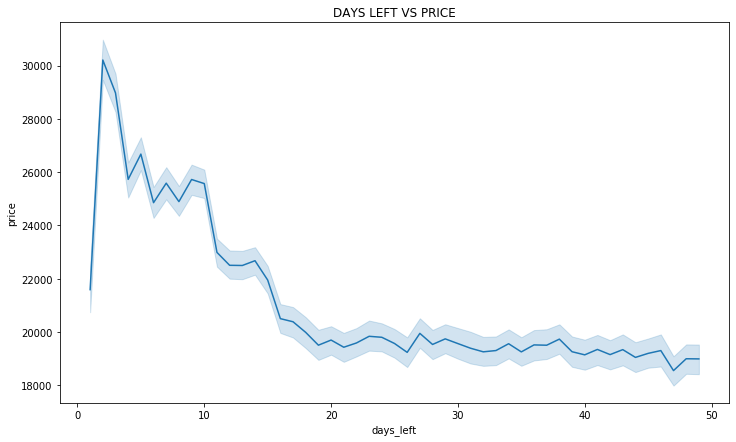

In [17]:
plt.figure(figsize=(12,7))
sns.lineplot(x="days_left", y="price", data=data)
plt.title("DAYS LEFT VS PRICE")
plt.show()

# PRICE is lowest and stable when 20-50 DAYS are left for DEPARTURE
# Gradually , PRICE starts increasing drastically when DAYS of DEPARTURE is nearer

# Just before the day of DEPARTURE a fall in PRICE can be seen. It can be clarified as seats were still empty and hence reduced
# the PRICE making sure PLANE is full thereby making OPTIMUM USE

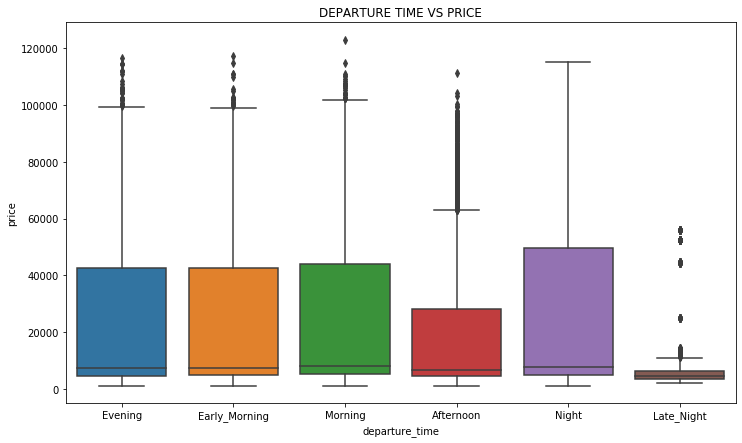

In [9]:
# 6.) Does PRICE change based on DEPARTURE TIME and ARRIVAL TIME

plt.figure(figsize=(12,7))
sns.boxplot(x="departure_time", y="price", data=data)
plt.title("DEPARTURE TIME VS PRICE")
plt.show()

# PRICE is highest when DEPARTURE TIME is at NIGHT
# PRICE is cheapest when DEPARTURE TIME is at LATE_NIGHT 
# PRICE is comparatively cheaper when DEPARTURE TIME is AFTERNOON than EVENING, EARLY_MORNING, MORNING

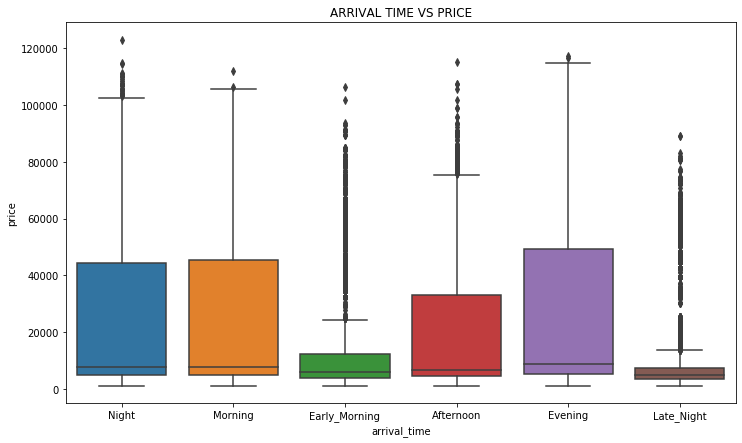

In [10]:
plt.figure(figsize=(12,7))
sns.boxplot(x="arrival_time", y="price", data=data)
plt.title("ARRIVAL TIME VS PRICE")
plt.show()

# PRICE is highest when ARRIVAL TIME is at EVENING
# PRICE is cheapest when ARRIVAL TIME is at LATE_NIGHT 
# PRICE is comparatively cheaper when ARRIVAL TIME is EARLY_MORNING than NIGHT, MORNING, AFTERNOON

# PRICE is cheapest when both DEPARTURE TIME and ARRIVAL TIME is at LATE_NIGHT

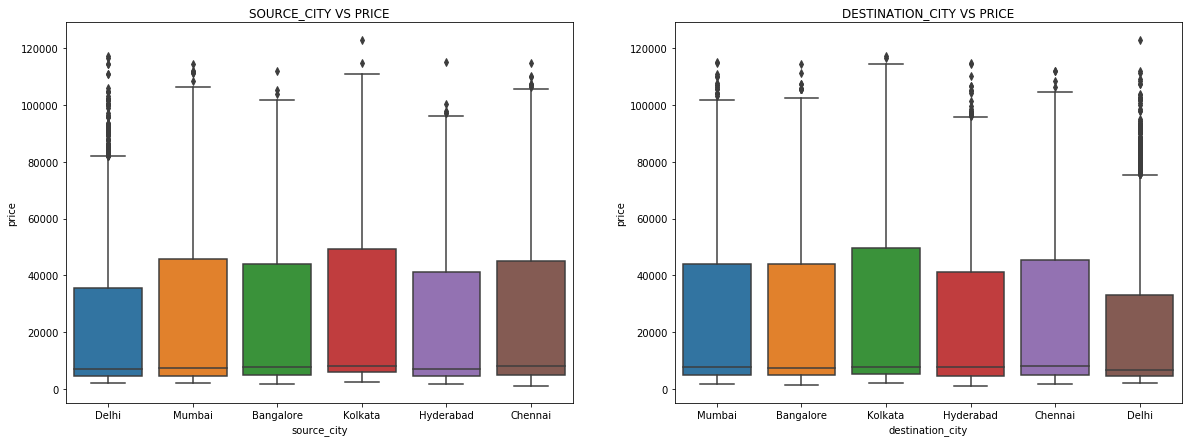

In [11]:
# 7.) How the PRICE changes with change in SOURCE_CITY and DESTINATION_CITY

plt.figure(figsize=(20,7))

plt.subplot(1,2,1)                                          # row, column, figure1
sns.boxplot(x="source_city", y="price", data=data)
plt.title("SOURCE_CITY VS PRICE")

plt.subplot(1,2,2)
sns.boxplot(x="destination_city", y="price", data=data)
plt.title("DESTINATION_CITY VS PRICE")

plt.show()


# PRICE is highest when flight takes off from KOLKATA followed by MUMBAI, BANGLORE and CHENNAI
# PRICE is lowest when flight takes off from DELHI


# PRICE is highest for flights whose DESTINATION_CITY is KOLKATA followed by CHENNAI
# PRICE is lowest for flights whose DESTINATION_CITY is DELHI


#  PRICE is lowest when both SOURCE_CITY and DESTINATION_CITY is DELHI

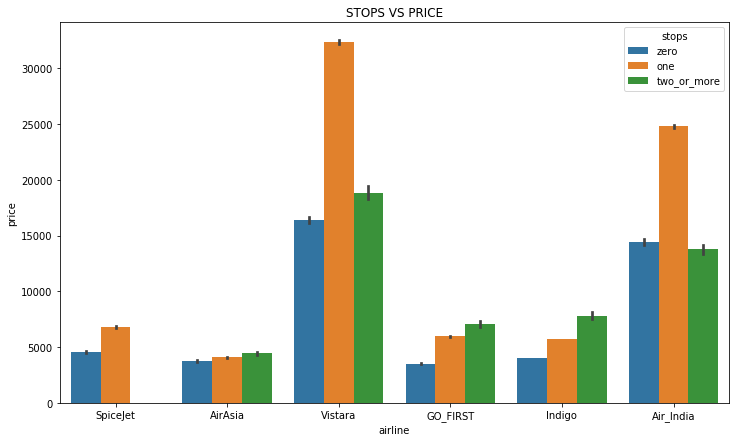

In [21]:
# 8.) Does number of STOP influence PRICE

plt.figure(figsize=(12,7))
sns.barplot(x="airline", y="price", hue="stops", data=data)
plt.title("STOPS VS PRICE")
plt.show()

# PRICE is MAXIMUM for ONE STOP in VISTARA and AIR_INDIA AIRLINE
# As the number of STOP keep on INCREASING so does the PRICE in SPICEJET, AirASIA, GO_FIRST and INDIGO
# However, AirAsia PRICE seems to be slightly stable despite the INCREASE in number of STOP

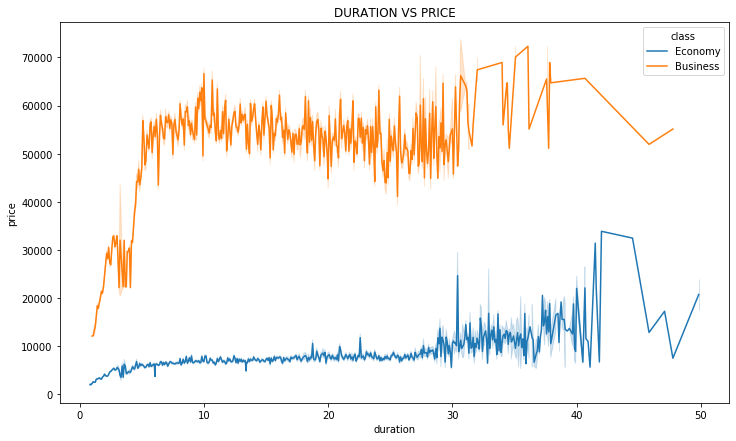

In [22]:
# 9.) Does the Price change with the DURATION of the flight

plt.figure(figsize=(12,7))
sns.lineplot(x="duration", y="price", hue="class", data=data)
plt.title("DURATION VS PRICE")
plt.show()

# As the DURATION (no. of  hours) INCREASES so does the PRICE in both ECONOMY and BUSINESS CLASS

# PRE-PROCESSING

In [23]:
data.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [29]:
print(data["stops"].unique())

print(data["class"].unique())

['zero' 'one' 'two_or_more']
['Economy' 'Business']


In [30]:
# 1.) Replacing Categorical Variable *STOPS and CLASS* with Numerical Variable

data["stops"].replace({"zero":0, "one":1, "two_or_more":2}, inplace=True)
data["class"].replace({"Economy":0, "Business":1}, inplace=True)

# did manually as the data was ORDINAL in nature

In [31]:
data.dtypes
# data type has changed to int

airline              object
flight               object
source_city          object
departure_time       object
stops                 int64
arrival_time         object
destination_city     object
class                 int64
duration            float64
days_left             int64
price                 int64
dtype: object

In [32]:
# 2.) Dropping FLIGHT (object) variable as it has many unique values

data.drop(["flight"], axis=1, inplace=True)

# converting flight object->numerical would lead to many column creation which is useless

In [33]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [34]:
# 3.) Converting Categorical Variable to Numerical Variable using PANDAS get_dummies

dummy = ["airline","source_city","departure_time","arrival_time","destination_city"]   # var that needed change

data_new = pd.get_dummies(data[dummy], drop_first=True)          # storing it in new dataframe--> data_new
data_new

# used pandas get dummies as above variables has NOMINAL data

,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
300149,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
300150,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
300151,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [35]:
# CONCATENATING both dataframes data and data_new

data = pd.concat([data, data_new], axis=1)     
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,...,0,0,0,0,1,0,0,0,0,1
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,...,0,0,0,1,0,0,0,0,0,1
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,...,1,0,0,0,0,0,0,0,0,1
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,...,0,0,0,0,0,0,0,0,0,1
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,...,0,0,0,1,0,0,0,0,0,1


In [36]:
# Dropping ORIGINAL CATEGORICAL variable 

data.drop(["airline","source_city","departure_time","arrival_time","destination_city"], axis=1, inplace=True)

In [37]:
data.head(10)

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,2.17,1,5956,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
5,0,0,2.33,1,5955,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,0,0,2.08,1,6060,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
7,0,0,2.17,1,6060,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
8,0,0,2.17,1,5954,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9,0,0,2.25,1,5954,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [38]:
pd.set_option("display.max_columns",30)   # 30 is number of columns
data.head(10)

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,2.17,1,5956,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
5,0,0,2.33,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6,0,0,2.08,1,6060,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
7,0,0,2.17,1,6060,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
8,0,0,2.17,1,5954,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9,0,0,2.25,1,5954,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [39]:
data.shape

(300153, 30)

In [40]:
data.dtypes

# All variables have converted to NUMERICAL 

stops                             int64
class                             int64
duration                        float64
days_left                         int64
price                             int64
airline_Air_India                 uint8
airline_GO_FIRST                  uint8
airline_Indigo                    uint8
airline_SpiceJet                  uint8
airline_Vistara                   uint8
source_city_Chennai               uint8
source_city_Delhi                 uint8
source_city_Hyderabad             uint8
source_city_Kolkata               uint8
source_city_Mumbai                uint8
departure_time_Early_Morning      uint8
departure_time_Evening            uint8
departure_time_Late_Night         uint8
departure_time_Morning            uint8
departure_time_Night              uint8
arrival_time_Early_Morning        uint8
arrival_time_Evening              uint8
arrival_time_Late_Night           uint8
arrival_time_Morning              uint8
arrival_time_Night                uint8


In [41]:
data_corr = data.corr()
data_corr

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
stops,1.000000,0.001027,0.468059,-0.008540,0.119648,0.060215,-0.033363,-0.172133,-0.087293,0.098758,0.021379,-0.052321,0.011196,0.046828,-0.022452,0.010145,-0.041882,-0.035366,0.052600,-0.058166,-0.018657,0.070912,-0.018544,-0.045666,0.017965,0.060865,-0.104565,0.029073,0.062722,-0.046849
class,0.001027,1.000000,0.138710,-0.013039,0.937860,0.124899,-0.194540,-0.275477,-0.118325,0.302116,0.010204,-0.014098,0.003367,-0.019162,0.015941,-0.012120,0.010789,-0.029378,0.002801,0.049516,-0.041974,0.032833,-0.086238,0.039745,0.008035,0.012331,-0.021200,0.007564,-0.012987,0.010573
duration,0.468059,0.138710,1.000000,-0.039157,0.204222,0.277283,-0.139380,-0.365953,0.008776,0.132430,0.033053,-0.049719,0.002595,0.061133,-0.023329,-0.047092,0.104017,-0.045045,-0.071084,0.115464,0.010950,0.033094,-0.107301,0.122906,-0.064458,0.061271,-0.115412,0.065762,0.061440,-0.043900
days_left,-0.008540,-0.013039,-0.039157,1.000000,-0.091949,-0.022721,0.030408,0.007839,-0.024414,-0.007002,0.002581,-0.001292,0.010817,0.000265,-0.008742,0.003322,-0.010238,0.012000,-0.003206,0.004004,0.020204,-0.013737,0.026500,-0.003619,-0.004593,0.000456,0.006233,-0.000018,-0.003840,-0.004337
price,0.119648,0.937860,0.204222,-0.091949,1.000000,0.070041,-0.194179,-0.280882,-0.114019,0.360816,0.018742,-0.043282,-0.012828,0.016127,0.013206,-0.012232,0.007946,-0.033768,0.018199,0.041768,-0.060449,0.056408,-0.093602,0.030379,0.020344,0.018473,-0.052527,-0.008292,0.020956,0.010533
airline_Air_India,0.060215,0.124899,0.277283,-0.022721,0.070041,1.000000,-0.175687,-0.248781,-0.106858,-0.523242,-0.011600,0.009886,0.001987,-0.001883,0.036697,0.033703,0.019692,-0.006956,-0.024826,0.010730,-0.025510,-0.040356,-0.059937,0.066735,-0.001920,0.005760,-0.017354,0.010900,-0.006201,0.042490
airline_GO_FIRST,-0.033363,-0.194540,-0.139380,0.030408,-0.194179,-0.175687,1.000000,-0.118471,-0.050886,-0.249171,-0.063273,0.030585,-0.023541,0.000409,0.026898,0.028405,-0.003699,0.008566,-0.040410,-0.025366,0.085654,-0.043881,0.100450,-0.063926,-0.000382,-0.059581,0.034305,-0.025814,-0.001016,0.026916
airline_Indigo,-0.172133,-0.275477,-0.365953,0.007839,-0.280882,-0.248781,-0.118471,1.000000,-0.072057,-0.352838,0.033626,-0.012615,0.009778,0.016766,-0.029344,-0.032224,-0.020572,0.077697,0.028371,-0.072394,0.013864,0.007335,0.065025,-0.082781,-0.009271,0.018089,-0.002593,0.000244,0.033801,-0.031242
airline_SpiceJet,-0.087293,-0.118325,0.008776,-0.024414,-0.114019,-0.106858,-0.050886,-0.072057,1.000000,-0.151553,0.003331,0.033040,-0.050872,0.030020,-0.004572,0.033931,0.003626,-0.011630,-0.028322,0.005247,0.022834,-0.042162,0.003302,0.030808,0.013312,-0.002283,0.040668,-0.050272,0.029817,-0.000058
airline_Vistara,0.098758,0.302116,0.132430,-0.007002,0.360816,-0.523242,-0.249171,-0.352838,-0.151553,1.000000,0.031174,-0.046163,0.028317,-0.027183,-0.006793,-0.036206,-0.005037,-0.056948,0.056992,0.042486,-0.058766,0.091317,-0.135247,0.030260,0.024874,0.027766,-0.038389,0.035434,-0.030555,-0.016810


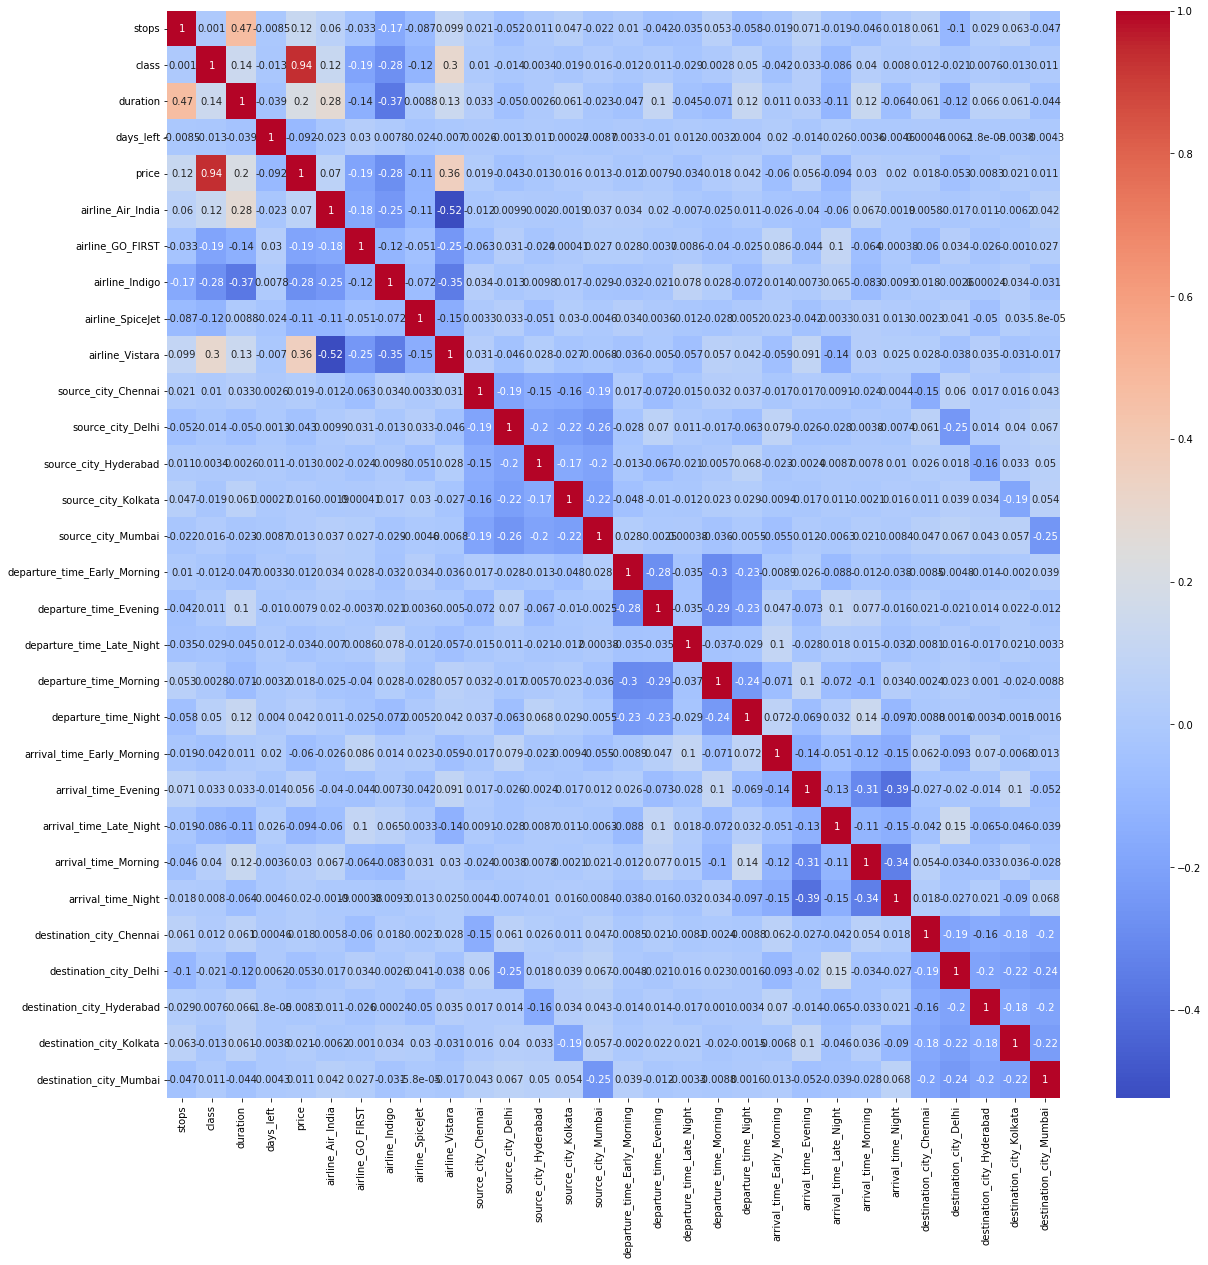

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(data_corr, annot=True, cmap="coolwarm")
plt.show()

# price and class have high corelation

In [43]:
# Creating X independent and Y dependent variable

X = data.drop(["price"], axis=1)
Y = data["price"]

In [44]:
print(X.shape)
print(Y.shape)

(300153, 29)
(300153,)


In [45]:
# Split the data into test and train

from sklearn.model_selection import train_test_split

#80-20 data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [46]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(240122, 29)
(240122,)
(60031, 29)
(60031,)


In [47]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)

X_train=scaler.transform(X_train)

X_test=scaler.transform(X_test)

# BUILDING THE MODEL

 PREDICTING USING DECISON TREE REGRESSOR:

In [48]:
from sklearn.tree import DecisionTreeRegressor

model_DecisionTree=DecisionTreeRegressor(criterion="mse",random_state=10)    

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)

Y_pred=model_DecisionTree.predict(X_test)
#print(Y_pred)

In [49]:
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9763596003935032
RMSE: 3495.937705088165
Adj R-square: 0.9763573160914385


PREDICTING USING RANDOM FOREST REGRESSOR:

In [50]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForest=RandomForestRegressor(n_estimators=100,random_state=10,bootstrap=True,   
                                         max_features=None)   

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)
#print(Y_pred)

In [51]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9851389615779138
RMSE: 2771.7934046804808
Adj R-square: 0.9851375255996174


PREDICTING USING EXTRA TREES REGRESSOR:

In [52]:
from sklearn.ensemble import ExtraTreesRegressor

model_EXT = ExtraTreesRegressor(n_estimators=100, random_state=10)
 
#fit the model on the data and predict the values
model_EXT.fit(X_train, Y_train)

Y_pred = model_EXT.predict(X_test)

In [53]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9829629507428609
RMSE: 2967.792056382504
Adj R-square: 0.9829613045030576


PREDICTING USING ADABOOST REGRESSOR:

In [54]:
from sklearn.ensemble import AdaBoostRegressor

model_AdaBoost = AdaBoostRegressor(n_estimators=100, random_state=10)

# fit the model on the data and predict the values
model_AdaBoost.fit(X_train, Y_train)

Y_pred = model_AdaBoost.predict(X_test)

In [55]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9268549586688484
RMSE: 6149.343076944287
Adj R-square: 0.9268478908793134


PREDICTING USING GRADIENT BOOSTING REGRESSOR:

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

model_GradientBoosting=GradientBoostingRegressor(n_estimators=100,random_state=10) 

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

In [57]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9524964339565568
RMSE: 4955.635837856897
Adj R-square: 0.9524918438271257


PREDICTING USING XGB REGRESSOR:

In [58]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=100,random_state=10)  

#fit the model on the data and predict the values

model_xgb.fit(X_train,Y_train)

Y_pred=model_xgb.predict(X_test)

In [59]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9756007097526675
RMSE: 3551.6067702873393
Adj R-square: 0.9755983521212392


KNN and SVM not applied as these algorithm is suitable for less no. of observation and our DATASET has huge no. of observation

# SELECTING THE BEST MODEL

In [ ]:
"""
DECISION TREE:
R-squared: 0.9763596003935032
RMSE: 3495.937705088165
Adj R-square: 0.9763573160914385     

RANDOM FOREST:
R-squared: 0.9851389615779138                      
RMSE: 2771.7934046804808               *
Adj R-square: 0.9851375255996174          *
    
EXTRA TREES:
R-squared: 0.9829629507428609
RMSE: 2967.792056382504                **
Adj R-square: 0.9829613045030576           **
    
ADABOOST:
R-squared: 0.9268549586688484
RMSE: 6149.343076944287
Adj R-square: 0.9268478908793134
    
GRADIENT BOOSTING:
R-squared: 0.9524964339565568
RMSE: 4955.635837856897
Adj R-square: 0.9524918438271257
    
XGB:
R-squared: 0.9756007097526675
RMSE: 3551.6067702873393
Adj R-square: 0.9755983521212392    
"""

ON COMPARING , RANDOM FOREST AND EXTRA TREES ARE THE BEST MODEL AMONG ALL AS BOTH MODEL HAVE HIGH
ADJ R-square AND LOW RMSE

# TRAINING THE DATASET WITH RANDOM FOREST AND COMPARING WITH Y_TEST

In [62]:
#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)
#print(Y_pred)

In [84]:
compare = pd.DataFrame({"Y_test/actual":Y_test,"Y_pred":Y_pred})
compare.sample(20)

,Y_test/actual,Y_pred
282680,56702,56705.150
42653,4979,5044.710
119582,6510,6516.510
134268,4604,11715.705
164022,4416,4841.270
159801,7393,7847.810
255200,51817,51817.000
143899,6489,6627.450
237965,62045,62157.000
287782,57920,66125.550


In [85]:
compare.shape

(60031, 2)

# CONCLUSION

In [ ]:
"""
If you're planning to buy ticket few factors can be considered for booking cheap flight such as :
->PRICE is cheapest when DEPARTURE TIME is at LATE_NIGHT
->Just before the day of DEPARTURE a fall in PRICE can be seen
->As the DURATION (no. of  hours) INCREASES so does the PRICE in both ECONOMY and BUSINESS CLASS
->As the number of STOP keep on INCREASING so does the PRICE 
"""